In [1]:
%matplotlib inline
from erddapy import ERDDAP
import cmocean
import matplotlib.pyplot as plt
import xarray as xr
import netCDF4 as nc

In [10]:
server = 'https://upwell.pfeg.noaa.gov/erddap'
protocol = 'griddap'
dataset_id = 'jplMURSST41'
full_url = '/'.join([server, protocol, dataset_id])
full_url

da = xr.open_dataset(full_url)
da

<xarray.Dataset>
Dimensions:           (time: 7117, latitude: 17999, longitude: 36000)
Coordinates:
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2021-11-2...
  * latitude          (latitude) float32 -89.99 -89.98 -89.97 ... 89.98 89.99
  * longitude         (longitude) float32 -180.0 -180.0 -180.0 ... 180.0 180.0
Data variables:
    analysed_sst      (time, latitude, longitude) float64 ...
    analysis_error    (time, latitude, longitude) float64 ...
    mask              (time, latitude, longitude) float32 ...
    sea_ice_fraction  (time, latitude, longitude) float64 ...
Attributes: (12/50)
    acknowledgement:            Please acknowledge the use of these data with...
    cdm_data_type:              Grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    creator_name:               JPL MUR SST project
    ...                         ...
    summary:                    This is a merged, multi-sensor L4 Foundation ...
    testOutOfDate:              now-3days
    time_coverage_end:          2021-11-27T09:00:00Z
    time_coverage_start:        2002-06-01T09:00:00Z
    title:                      Multi-scale Ultra-high Resolution (MUR) SST A...
    Westernmost_Easting:        -179.99

In [11]:
sst = da['analysed_sst'].sel(  
    latitude = slice(39., 42),
    longitude = slice(-72., -69.),
    time = slice("2021-11-05", "2021-11-05")
)
sst

<xarray.DataArray 'analysed_sst' (time: 1, latitude: 301, longitude: 301)>
array([[[19.63 , 19.654, ..., 19.749, 19.741],
        [19.642, 19.666, ..., 19.723, 19.715],
        ...,
        [   nan,    nan, ..., 13.138, 13.149],
        [   nan,    nan, ..., 13.126, 13.14 ]]])
Coordinates:
  * time       (time) datetime64[ns] 2021-11-05T09:00:00
  * latitude   (latitude) float32 39.0 39.01 39.02 39.03 ... 41.98 41.99 42.0
  * longitude  (longitude) float32 -72.0 -71.99 -71.98 ... -69.02 -69.01 -69.0
Attributes:
    colorBarMaximum:  32.0
    colorBarMinimum:  0.0
    comment:          Interim near-real-time (nrt) version using Multi-Resolu...
    ioos_category:    Temperature
    long_name:        Analysed Sea Surface Temperature
    source:           MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTA_G-NAVO,...
    standard_name:    sea_surface_foundation_temperature
    units:            degree_C
    valid_max:        57.767
    valid_min:        -7.767000000000003

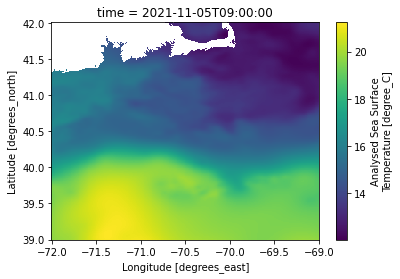

In [12]:
sst.isel(time=0).plot.imshow()